# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC 

from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where

# Read the CSV

In [2]:
# Read the CSV file into a dataframe
df = pd.read_csv(CSV_FILE_URL)
df.shape

(284807, 31)

# Data Cleaning

Checking to see if there are any null values in the dataset. 

In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

(284807, 31)

It could be seen that there are **no null values** in the dataset.

# Data Exploration

Checking Data distribution w.r.t Target feature

In [4]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


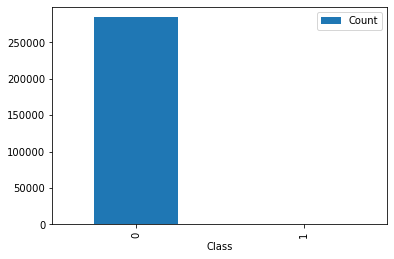

In [5]:
grouped_df = df[['Class','Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={"Time":"Count"})
grouped_df.plot(kind="bar")

It is evident from the above plot that data is **highly imbalanced**. The dataset has only 492 fraudulent transactions out of a total of 284,807 transactions, which is a mere **0.17%**.

# Defining features

Defining the predictor features and the target feature.

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Selecting predictor features. This will be used as x values.
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [8]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


In [9]:
X_original = selected_features
y_original = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X_original.shape, y_original.shape)

Shape:  (284807, 30) (284807, 1)


In [10]:
X_original_minmax = MinMaxScaler().fit(X_original)

X_original_scaled = X_original_minmax.transform(X_original)

# SMOTE Oversampling

In [11]:
# summarize class distribution
counter = Counter(y.flatten())
print(counter)

Counter({0: 284315, 1: 492})


In [12]:
# define the SMOTE method
oversample = SMOTE()

In [13]:
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [14]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 284315, 1: 284315})


## Create a Train Test Split

Using `Class` for the y values (target feature)

In [15]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (426472, 30) (426472,) (142158, 30) (142158,)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [17]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

In [18]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Train the Models

In [44]:
randomForestModel = RandomForestClassifier(n_estimators=200)
decisionTreeModel = DecisionTreeClassifier()
gradientBoostingModel = GradientBoostingClassifier(n_estimators=100)
adaBoostModel = AdaBoostClassifier(n_estimators=100)

In [45]:
randomForestModel.fit(X_train_scaled, y_train.flatten())
decisionTreeModel.fit(X_train_scaled, y_train.flatten())
gradientBoostingModel.fit(X_train_scaled, y_train.flatten())
adaBoostModel.fit(X_train_scaled, y_train.flatten())

AdaBoostClassifier(n_estimators=100)

In [46]:
print(f"Random Forest: Training Data Score: {randomForestModel.score(X_train_scaled, y_train)}")
print(f"Random Forest: Testing Data Score: {randomForestModel.score(X_test_scaled, y_test)}")
print(f"Decision Tree: Training Data Score: {decisionTreeModel.score(X_train_scaled, y_train)}")
print(f"Decision Tree: Testing Data Score: {decisionTreeModel.score(X_test_scaled, y_test)}")
print(f"Gradient Boosting: Training Data Score: {gradientBoostingModel.score(X_train_scaled, y_train)}")
print(f"Gradient Boosting: Testing Data Score: {gradientBoostingModel.score(X_test_scaled, y_test)}")
print(f"Ada Boost: Training Data Score: {adaBoostModel.score(X_train_scaled, y_train)}")
print(f"Ada Boost: Testing Data Score: {adaBoostModel.score(X_test_scaled, y_test)}")

Random Forest: Training Data Score: 1.0
Random Forest: Testing Data Score: 0.9999085524557183
Decision Tree: Training Data Score: 1.0
Decision Tree: Testing Data Score: 0.9981921523938153
Gradient Boosting: Training Data Score: 0.9876896959237652
Gradient Boosting: Testing Data Score: 0.9872114126535264
Ada Boost: Training Data Score: 0.9879804535819467
Ada Boost: Testing Data Score: 0.9877530634927334


In [47]:
# Make predictions with the model
randomForestPredictions = randomForestModel.predict(X_test_scaled)
decisionTreePredictions = decisionTreeModel.predict(X_test_scaled)
gradientBoostingPredictions = gradientBoostingModel.predict(X_test_scaled)
adaBoostPredictions = adaBoostModel.predict(X_test_scaled)

In [48]:
randomForestPredictProba = randomForestModel.predict_proba(X_test_scaled)[:,1]
decisionTreePredictProba = decisionTreeModel.predict_proba(X_test_scaled)[:,1]
gradientBoostingPredictProba = gradientBoostingModel.predict_proba(X_test_scaled)[:,1]
adaBoostPredictProba = adaBoostModel.predict_proba(X_test_scaled)[:,1]

Random Forest Classifier with SMOTE on Oversampled Data
Accuracy:  0.9999085524557183
Precision:  0.9998172822848147
Recall:  1.0
F1-Score:  0.9999086327952038
AUC score:  0.9999084803514354
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71023
    Fraudulent       1.00      1.00      1.00     71135

      accuracy                           1.00    142158
     macro avg       1.00      1.00      1.00    142158
  weighted avg       1.00      1.00      1.00    142158



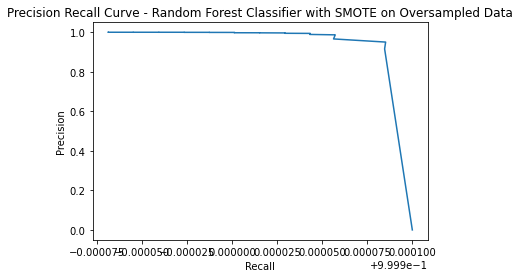

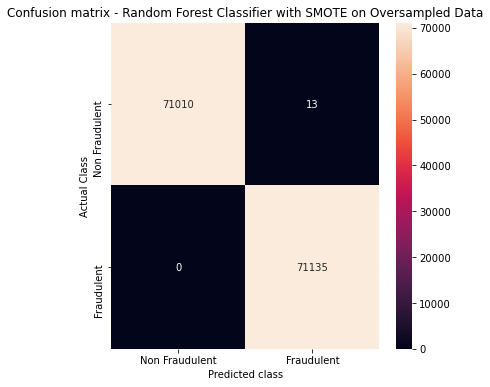

In [49]:
print("Random Forest Classifier with SMOTE on Oversampled Data")
print("=======================================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), randomForestPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), randomForestPredictions))
print("Recall: ",recall_score(y_test.flatten(), randomForestPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), randomForestPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), randomForestPredictions))
print(classification_report(y_test.flatten(), randomForestPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), randomForestPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier with SMOTE on Oversampled Data')

confusionMatrix = confusion_matrix(y_test.flatten(), randomForestPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier with SMOTE on Oversampled Data") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Decision Tree Classifier with SMOTE on Oversampled Data
Accuracy:  0.9981921523938153
Precision:  0.9973057169318852
Recall:  0.9990862444647501
F1-Score:  0.998195186696349
AUC score:  0.9981914474228064
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71023
    Fraudulent       1.00      1.00      1.00     71135

      accuracy                           1.00    142158
     macro avg       1.00      1.00      1.00    142158
  weighted avg       1.00      1.00      1.00    142158



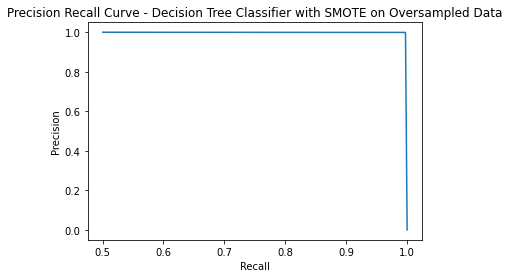

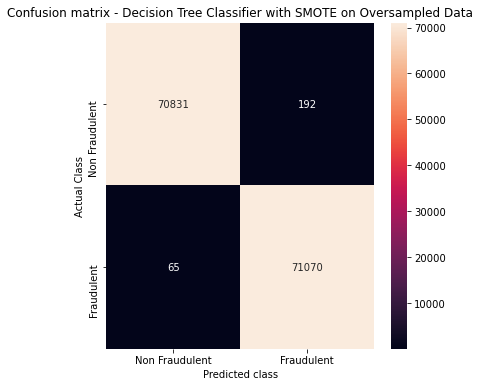

In [50]:
print("Decision Tree Classifier with SMOTE on Oversampled Data")
print("=======================================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), decisionTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), decisionTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), decisionTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), decisionTreePredictions))
print(classification_report(y_test.flatten(), decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier with SMOTE on Oversampled Data')

confusionMatrix = confusion_matrix(y_test.flatten(), decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier with SMOTE on Oversampled Data") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gradient Boosting Classifier with SMOTE on Oversampled Data
Accuracy:  0.9872114126535264
Precision:  0.9936756641264867
Recall:  0.9806846137625641
F1-Score:  0.987137399179284
AUC score:  0.9872165588841544
                precision    recall  f1-score   support

Non Fraudulent       0.98      0.99      0.99     71023
    Fraudulent       0.99      0.98      0.99     71135

      accuracy                           0.99    142158
     macro avg       0.99      0.99      0.99    142158
  weighted avg       0.99      0.99      0.99    142158



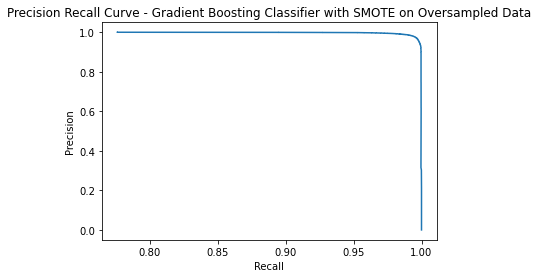

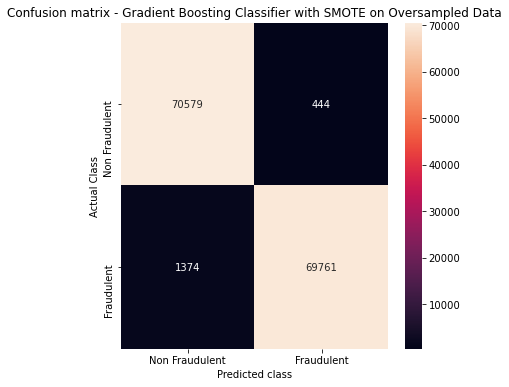

In [51]:
print("Gradient Boosting Classifier with SMOTE on Oversampled Data")
print("===========================================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gradientBoostingPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gradientBoostingPredictions))
print("Recall: ",recall_score(y_test.flatten(), gradientBoostingPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gradientBoostingPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gradientBoostingPredictions))
print(classification_report(y_test.flatten(), gradientBoostingPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gradientBoostingPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier with SMOTE on Oversampled Data')

confusionMatrix = confusion_matrix(y_test.flatten(), gradientBoostingPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier with SMOTE on Oversampled Data") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Ada Boosting Classifier with SMOTE on Oversampled Data
Accuracy:  0.9877530634927334
Precision:  0.9916817821108718
Recall:  0.9837773248049483
F1-Score:  0.987713739299803
AUC score:  0.9877561982711364
                precision    recall  f1-score   support

Non Fraudulent       0.98      0.99      0.99     71023
    Fraudulent       0.99      0.98      0.99     71135

      accuracy                           0.99    142158
     macro avg       0.99      0.99      0.99    142158
  weighted avg       0.99      0.99      0.99    142158



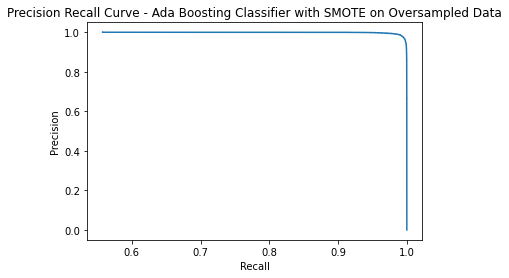

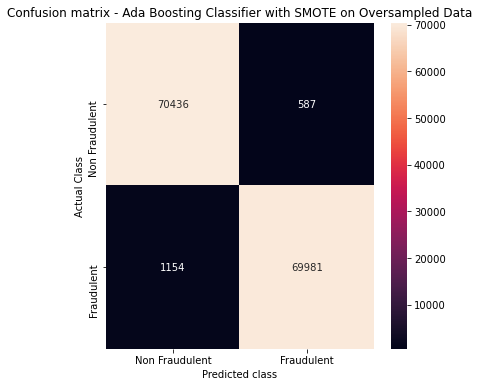

In [52]:
print("Ada Boosting Classifier with SMOTE on Oversampled Data")
print("===========================================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), adaBoostPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), adaBoostPredictions))
print("Recall: ",recall_score(y_test.flatten(), adaBoostPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), adaBoostPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), adaBoostPredictions))
print(classification_report(y_test.flatten(), adaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), adaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boosting Classifier with SMOTE on Oversampled Data')

confusionMatrix = confusion_matrix(y_test.flatten(), adaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boosting Classifier with SMOTE on Oversampled Data") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

## Test the model on original dataset

In [53]:
# Make predictions with the model
original_randomForestPredictions = randomForestModel.predict(X_original_scaled)
original_decisionTreePredictions = decisionTreeModel.predict(X_original_scaled)
original_gradientBoostingPredictions = gradientBoostingModel.predict(X_original_scaled)
original_adaBoostPredictions = adaBoostModel.predict(X_original_scaled)

In [54]:
original_randomForestPredictProba = randomForestModel.predict_proba(X_original_scaled)[:,1]
original_decisionTreePredictProba = decisionTreeModel.predict_proba(X_original_scaled)[:,1]
original_gradientBoostingPredictProba = gradientBoostingModel.predict_proba(X_original_scaled)[:,1]
original_adaBoostPredictProba = adaBoostModel.predict_proba(X_original_scaled)[:,1]

Random Forest Classifier with SMOTE on Original Data
Accuracy:  0.9998595540137707
Precision:  0.9312977099236641
Recall:  0.991869918699187
F1-Score:  0.9606299212598425
AUC score:  0.9958716492885695
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00    284315
    Fraudulent       0.93      0.99      0.96       492

      accuracy                           1.00    284807
     macro avg       0.97      1.00      0.98    284807
  weighted avg       1.00      1.00      1.00    284807



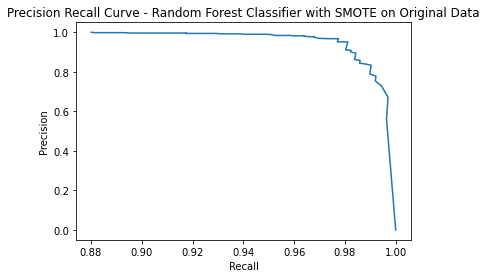

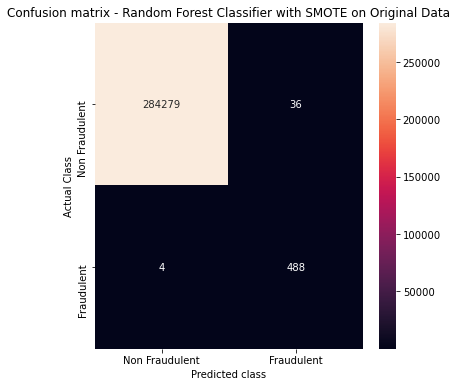

In [55]:
print("Random Forest Classifier with SMOTE on Original Data")
print("====================================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_randomForestPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_randomForestPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_randomForestPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_randomForestPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_randomForestPredictions))
print(classification_report(y_original.flatten(), original_randomForestPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_randomForestPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier with SMOTE on Original Data')

confusionMatrix = confusion_matrix(y_original.flatten(), original_randomForestPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier with SMOTE on Original Data") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Decision Tree Classifier with SMOTE on Original Data
Accuracy:  0.9987359861239365
Precision:  0.5804878048780487
Recall:  0.967479674796748
F1-Score:  0.7256097560975611
AUC score:  0.9831348745930348
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00    284315
    Fraudulent       0.58      0.97      0.73       492

      accuracy                           1.00    284807
     macro avg       0.79      0.98      0.86    284807
  weighted avg       1.00      1.00      1.00    284807



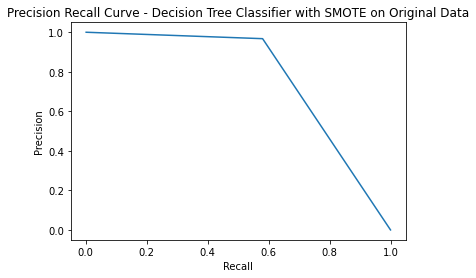

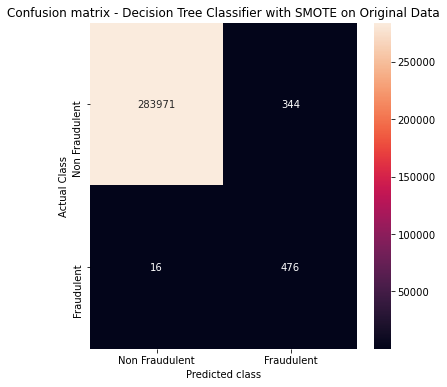

In [56]:
print("Decision Tree Classifier with SMOTE on Original Data")
print("====================================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_decisionTreePredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_decisionTreePredictions))
print("Recall: ",recall_score(y_original.flatten(), original_decisionTreePredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_decisionTreePredictions))
print(classification_report(y_original.flatten(), original_decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier with SMOTE on Original Data')

confusionMatrix = confusion_matrix(y_original.flatten(), original_decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier with SMOTE on Original Data") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gradient Boosting Classifier with SMOTE on Original Data
Accuracy:  0.9946174075777632
Precision:  0.23156266116554924
Recall:  0.9126016260162602
F1-Score:  0.36939531057178115
AUC score:  0.9536804799268646
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.99      1.00    284315
    Fraudulent       0.23      0.91      0.37       492

      accuracy                           0.99    284807
     macro avg       0.62      0.95      0.68    284807
  weighted avg       1.00      0.99      1.00    284807



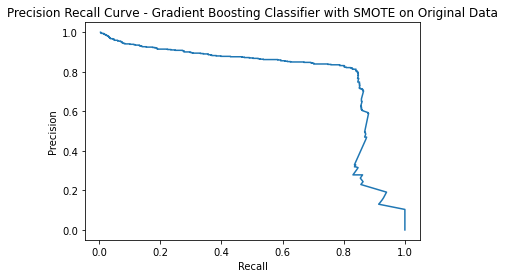

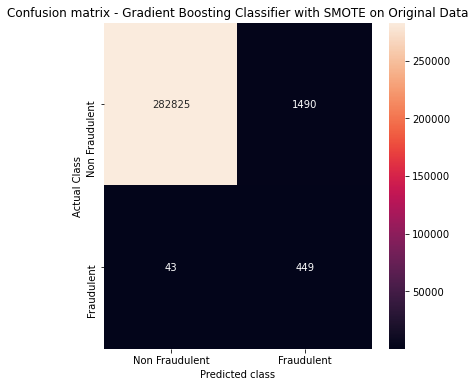

In [57]:
print("Gradient Boosting Classifier with SMOTE on Original Data")
print("========================================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_gradientBoostingPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_gradientBoostingPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_gradientBoostingPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_gradientBoostingPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_gradientBoostingPredictions))
print(classification_report(y_original.flatten(), original_gradientBoostingPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_gradientBoostingPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier with SMOTE on Original Data')

confusionMatrix = confusion_matrix(y_original.flatten(), original_gradientBoostingPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier with SMOTE on Original Data") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Ada Boost Classifier with SMOTE on Original Data
Accuracy:  0.993297215307208
Precision:  0.192090395480226
Recall:  0.8983739837398373
F1-Score:  0.3165055495882564
AUC score:  0.9459177306631585
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.99      1.00    284315
    Fraudulent       0.19      0.90      0.32       492

      accuracy                           0.99    284807
     macro avg       0.60      0.95      0.66    284807
  weighted avg       1.00      0.99      1.00    284807



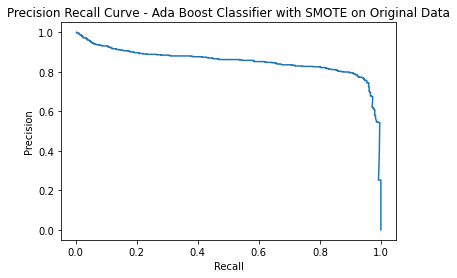

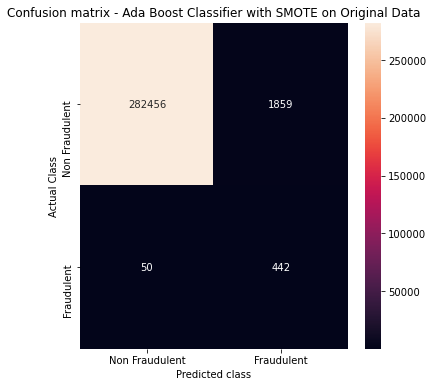

In [58]:
print("Ada Boost Classifier with SMOTE on Original Data")
print("================================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_adaBoostPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_adaBoostPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_adaBoostPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_adaBoostPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_adaBoostPredictions))
print(classification_report(y_original.flatten(), original_adaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_adaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boost Classifier with SMOTE on Original Data')

confusionMatrix = confusion_matrix(y_original.flatten(), original_adaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boost Classifier with SMOTE on Original Data") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

# Save the Model

In [59]:
filename = 'RandomForestClassifierWithSMOTEModel.sav'
joblib.dump(randomForestModel, filename)

['RandomForestClassifierWithSMOTEModel.sav']